In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as animation

In [108]:
#TODO: agregar seed, agregar conteo de pasos aceptados, correr todo con 0.1 dT.

En primer lugar realizamos una única simulacion de 10000000 de pasos a T = 1 para estimar el tiempo de autocorrelación.

In [26]:
corr_df = pd.read_csv("corr.dat", sep=r",")
corr_df.head()

,Paso,E_tot,E_med,E_sqr,M_tot,M_med,M_sqr,acept_ratio
0,500,-792.0,-810.056000,656311.328000,18.0,30.948000,1093.2080,0.4180
1,1000,-808.0,-803.096000,645309.280000,28.0,24.580000,729.3040,0.4380
2,1500,-788.0,-806.282667,650402.474667,12.0,26.114667,789.4080,0.4280
3,2000,-700.0,-790.642000,626261.608000,-14.0,20.190000,640.7680,0.4415
4,2500,-752.0,-784.654400,616862.214400,2.0,18.280800,563.2496,0.4444


In [17]:
def C_t(serie,t):
    """
    Toma una serie (pd.Series o np.array) de datos y un tiempo t y devuelve el valor de C(t)
    """
    avg_sqr = serie.mean()**2
    vals = []
    for i in range(len(serie)-t):
        vals.append(serie[i]*serie[i+t]-avg_sqr)
    return np.array(vals).mean()

In [28]:
corr = []
for i in range(1,100):
    corr.append(C_t(corr_df["E_tot"],i))

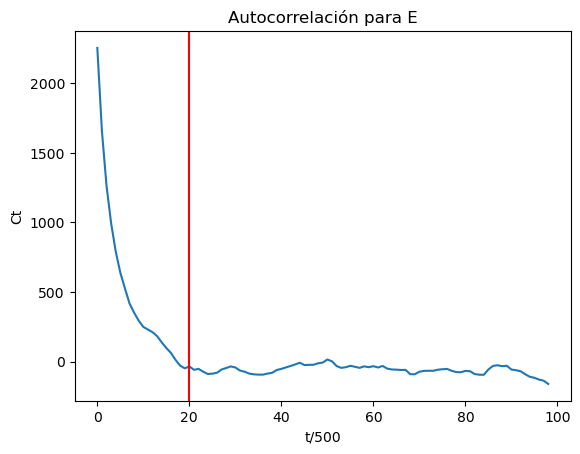

In [36]:
plt.plot(corr)
plt.title("Autocorrelación para E")
plt.axvline(x=20, color = "red")
plt.xlabel("t/500")
plt.ylabel("Ct")
plt.show()

Podemos decir que alrededor de 10000 pasos se decorrelacionan los valores. En todo lo que sigue se toman los valores cada 10000 pasos.

In [44]:
Ts = list(np.arange(4.0,0.49,-0.1))
N = 30
n_steps = 10000000

os.system("cp matriz_rand_30x30.dat matriz1.dat")
for T in Ts:
    T = round(T,2)
    with open("in.dat","w") as file:
        file.write(f"{T}\n{N}\n{n_steps}")
    os.system("./main")
    os.system(f"mv out.dat out_{T}.dat")
    os.system(f"cp matriz1.dat matriz_final_{T}.dat")
    os.system(f"mv matrix_out.dat traj_{T}.dat")

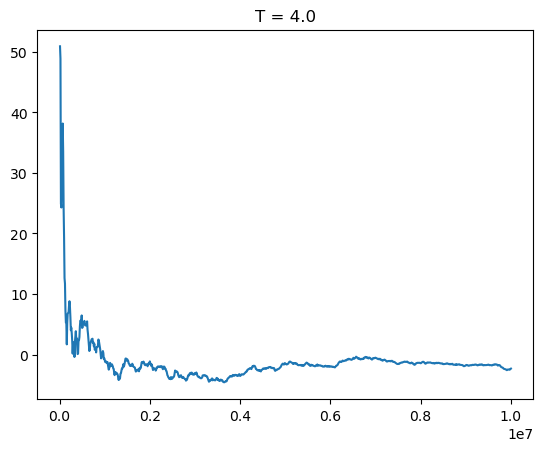

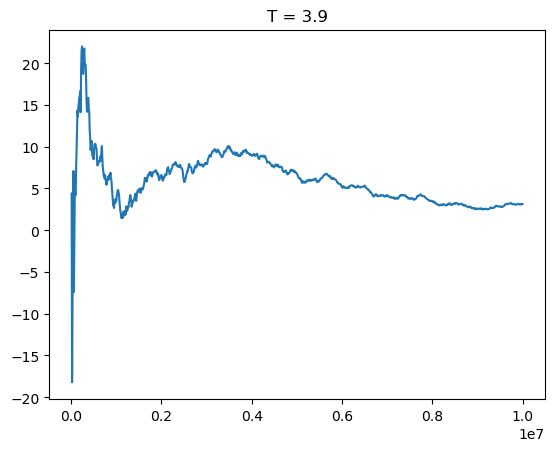

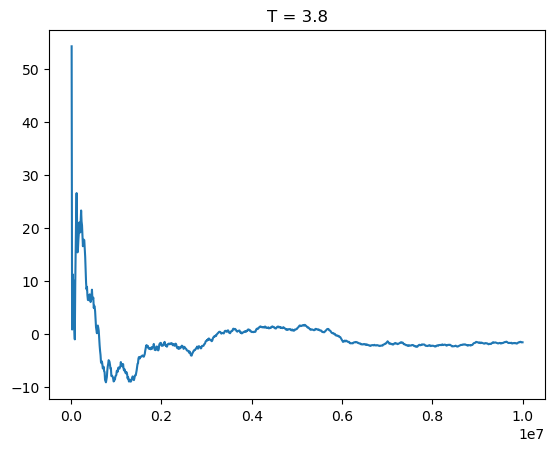

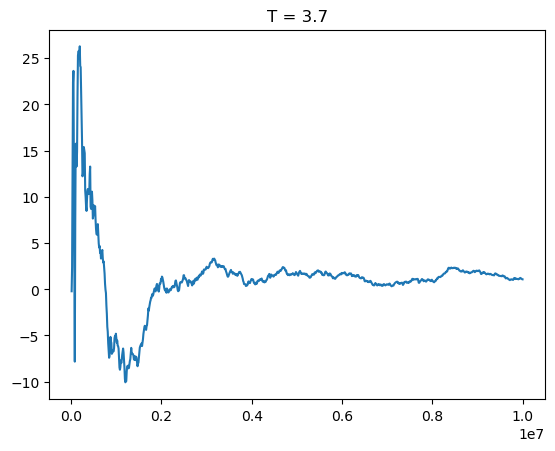

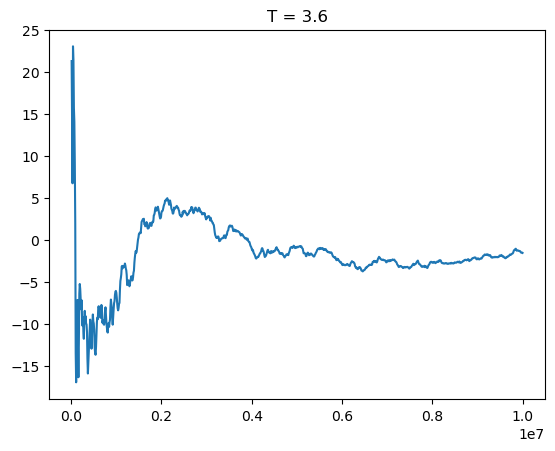

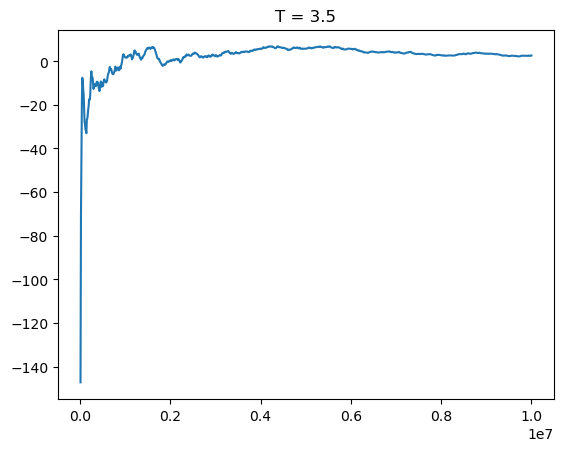

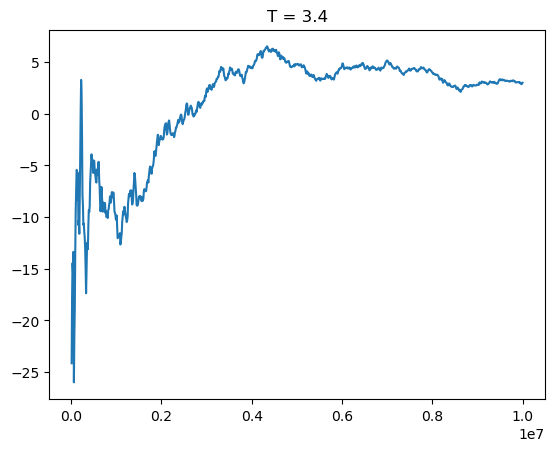

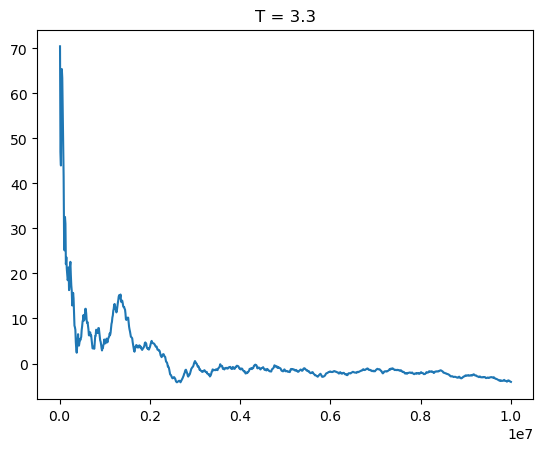

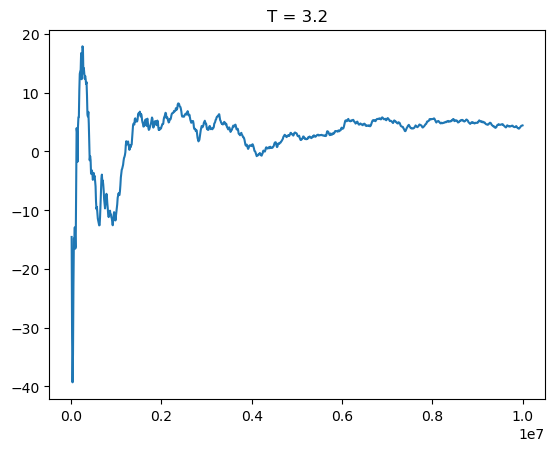

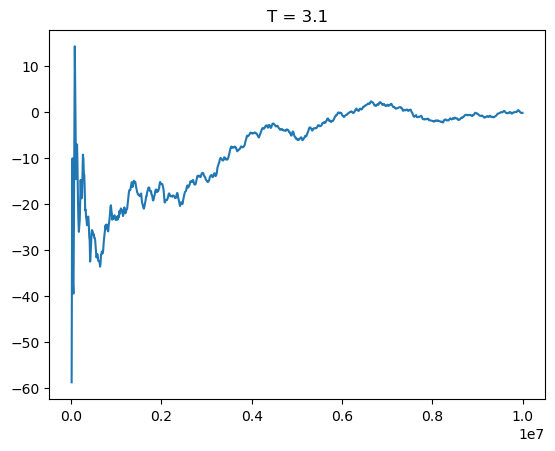

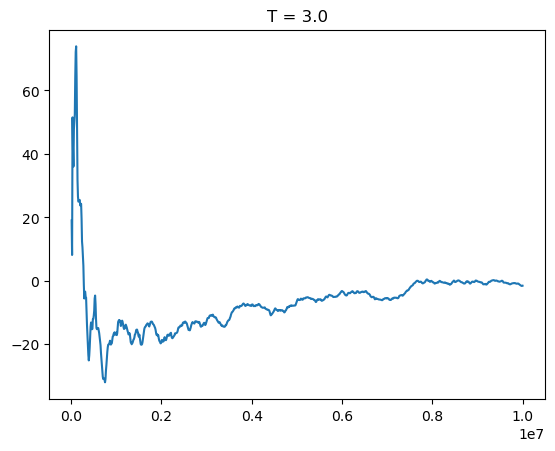

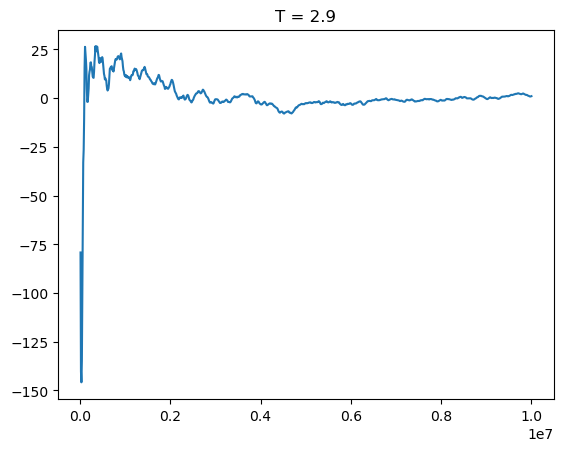

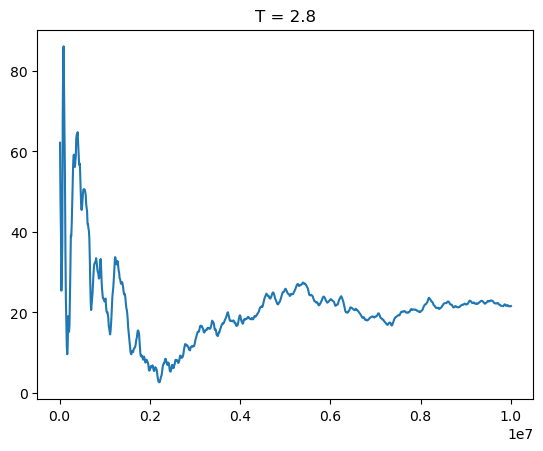

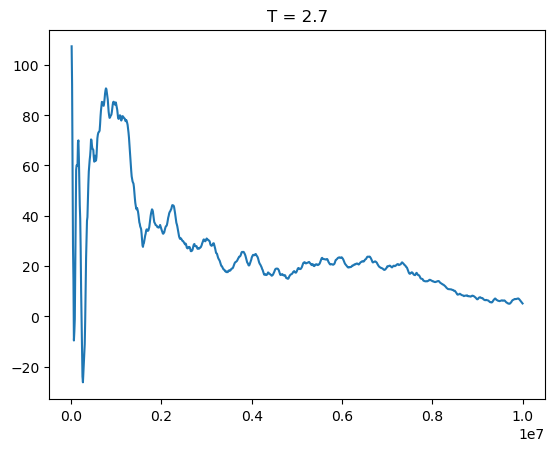

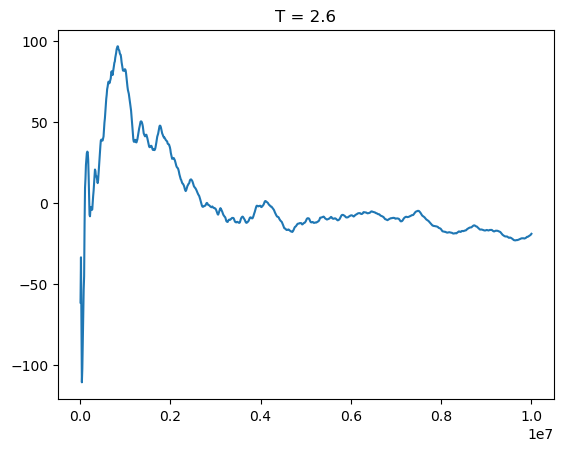

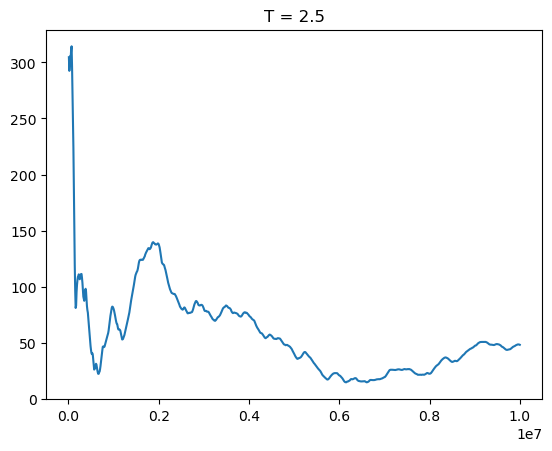

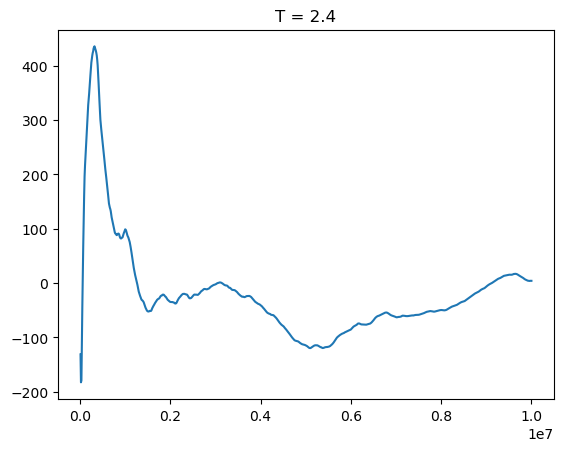

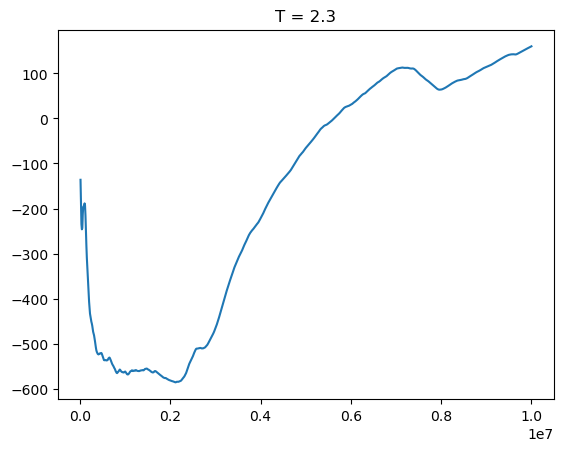

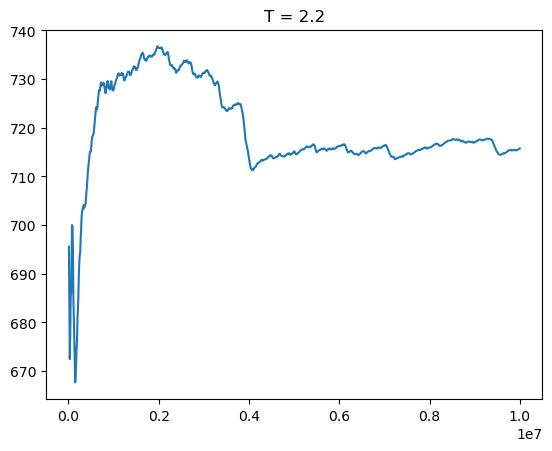

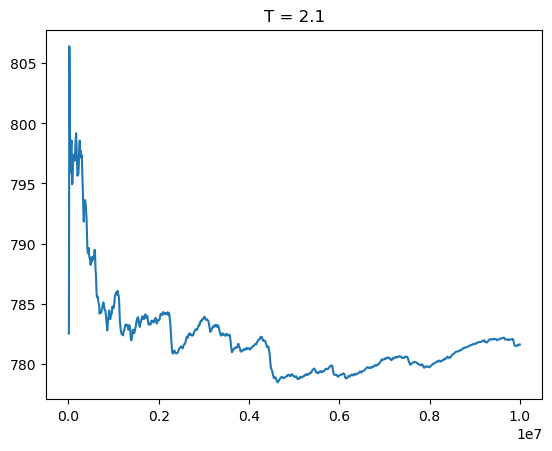

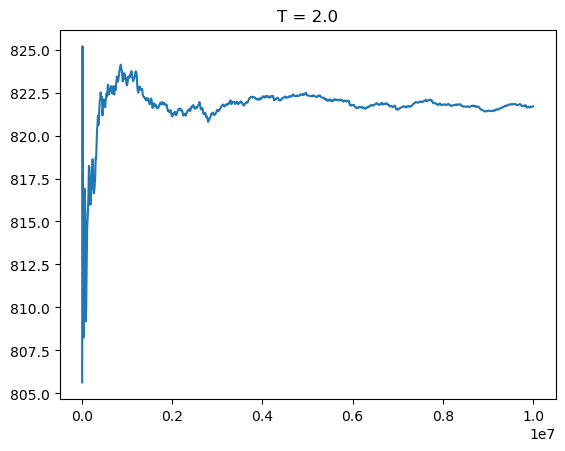

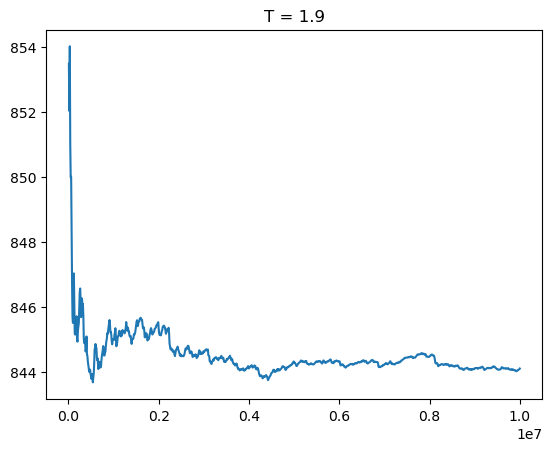

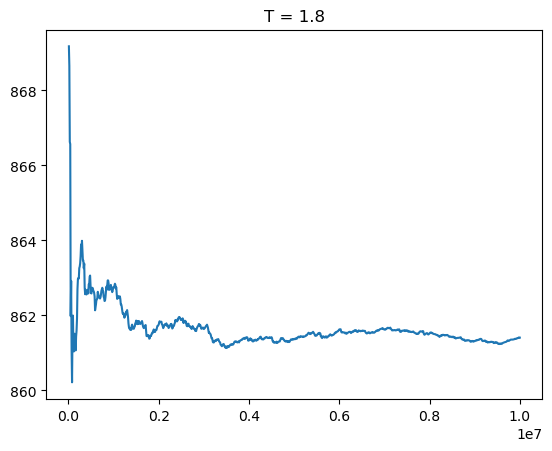

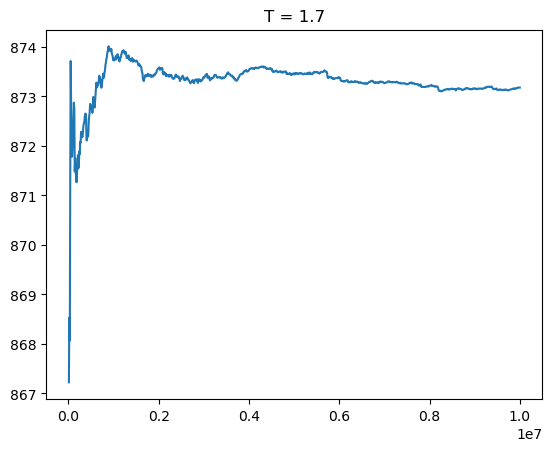

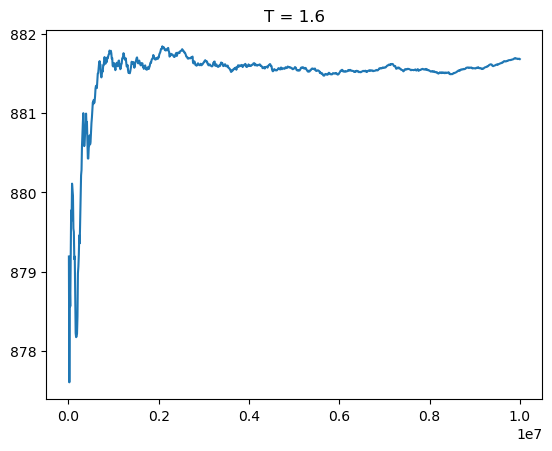

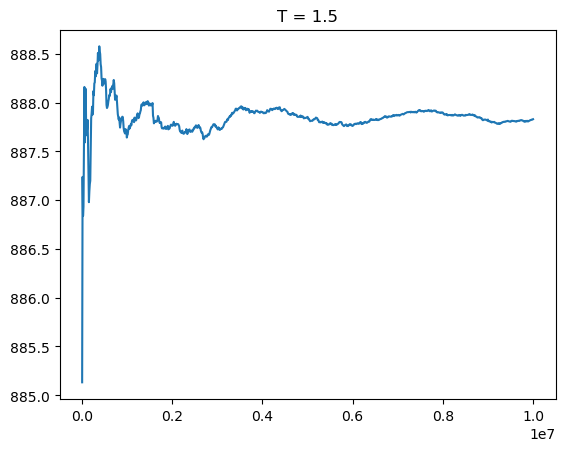

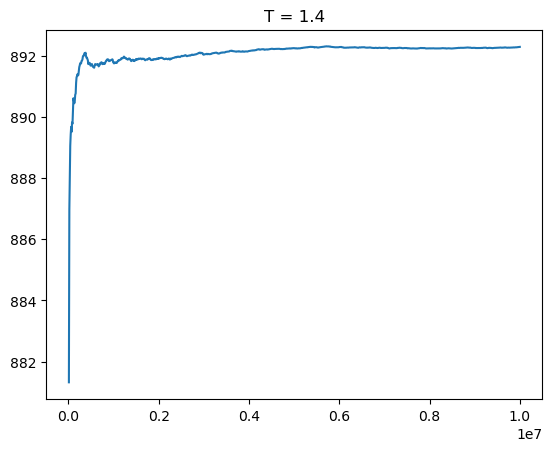

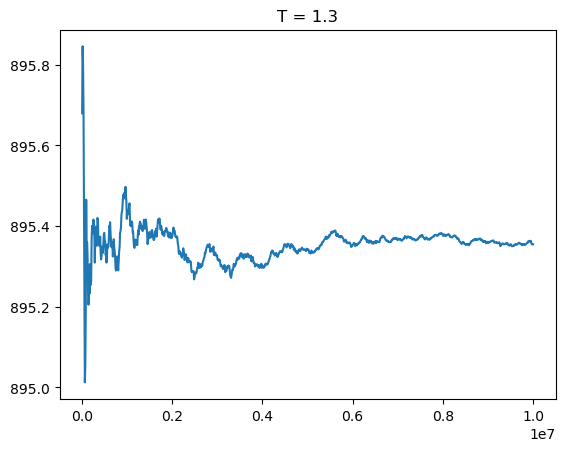

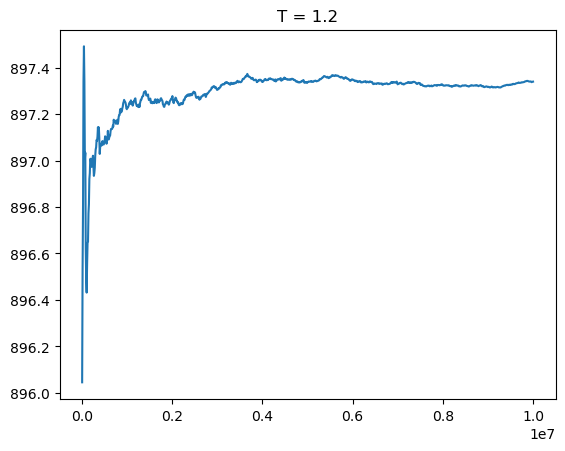

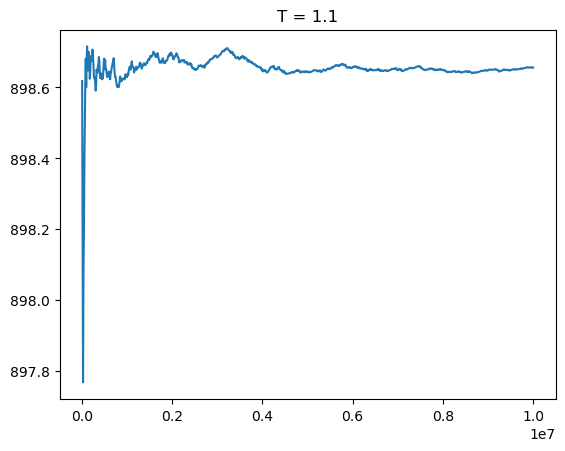

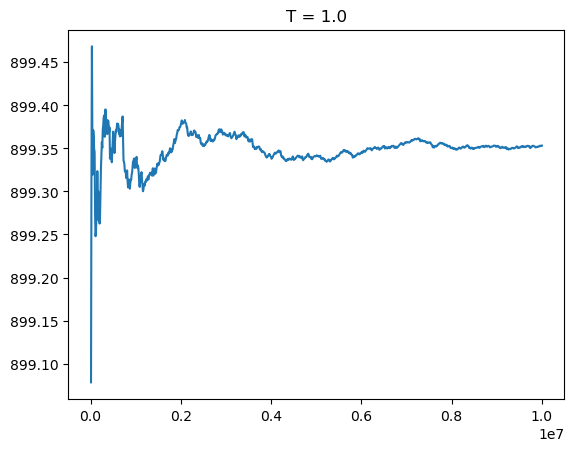

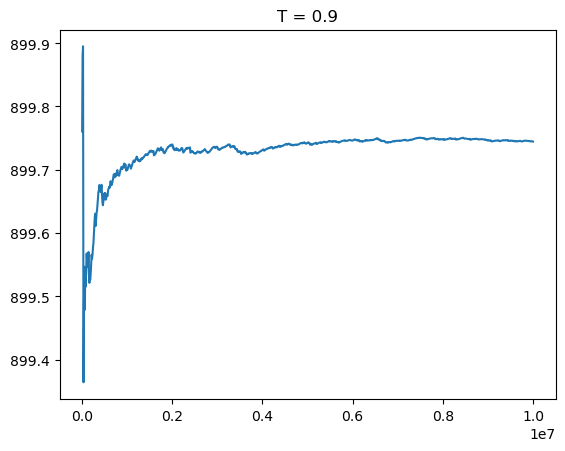

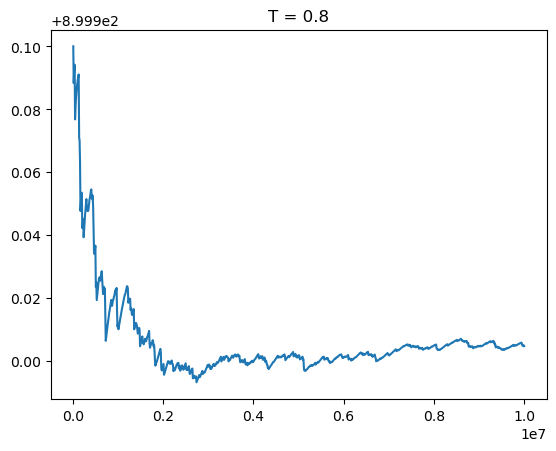

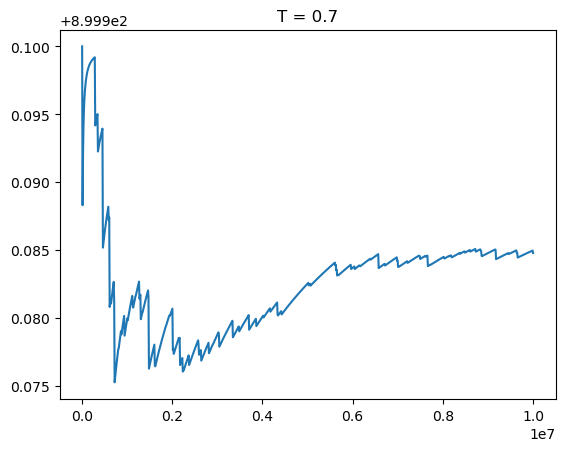

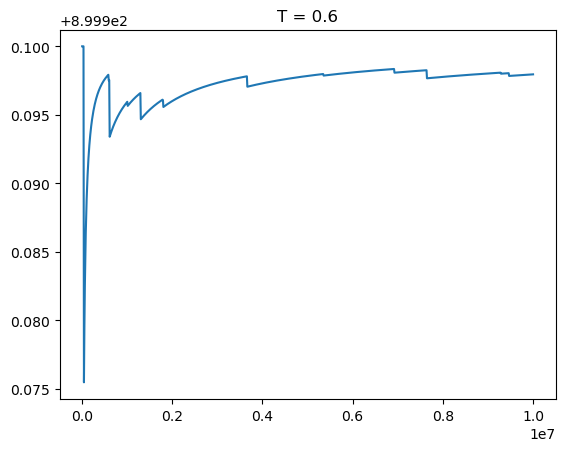

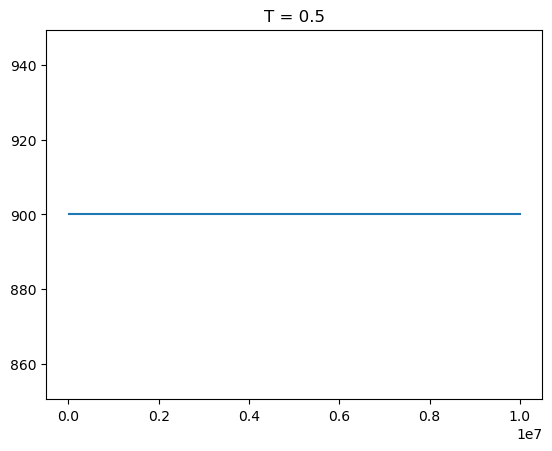

In [46]:
for T in Ts:
    T = round(T,2)
    df = pd.read_csv(f"outputs/out_{T}.dat", sep=r",", comment="#")
    plt.plot(df[" Paso"],df["M_med"])
    plt.title(f"T = {T}")
    plt.show()

In [77]:
df = pd.read_csv(f"out_0.75.dat", sep=r",", comment="#")
df["M_tot"]

0       -100.0
1       -100.0
2       -100.0
3       -100.0
4       -100.0
         ...  
79995   -100.0
79996   -100.0
79997   -100.0
79998   -100.0
79999   -100.0
Name: M_tot, Length: 80000, dtype: float64

In [83]:
A = np.loadtxt("matrix_out.dat",dtype=int)

In [90]:
A = A.reshape((4000,32,32))

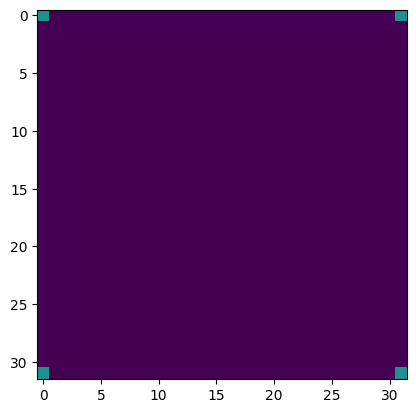

In [107]:
fig, ax = plt.subplots()
im = ax.imshow(A[0,:,:], vmin=-1, vmax=1)

def update(frame):
    im.set_data(A[frame,:,:])
    return [im]

ani = animation.FuncAnimation(
    fig, update, frames=200, interval=100, blit=True
)

ani.save("ising.mp4", writer="ffmpeg", fps=10)


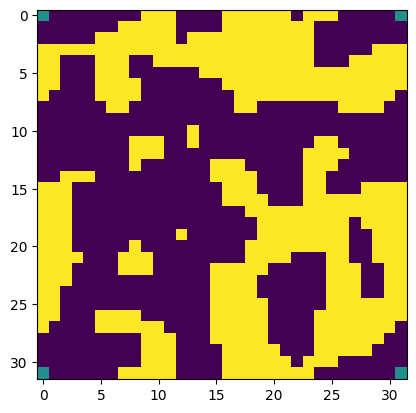

In [104]:
plt.imshow(A[3])